# Описание проекта

## Контекст

> Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. 
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Описание данных

### Данные для первой части
Файл /datasets/hypothesis.csv
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Данные для второй части
Файл /datasets/orders.csv
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ. <br/>

Файл /datasets/visitors.csv
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Этапы и задачи проекта
### Приоритизация гипотез:
* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

### Анализ A/B-теста:
* Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
* Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
* Построить график кумулятивного среднего количества заказов по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделать выводы и предположения.
* Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
* Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
* Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Ход исследования

## Загрузка данных и подготовка их к анализу

In [1]:
# импортируем все библиотеки, которые нам будут нужны для выполнения исследования

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
from scipy import stats as st
from datetime import datetime as dt

In [2]:
# откроем рабочие файлы

try:
    hypothesis_raw = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis_raw = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    
try:
    orders_raw = pd.read_csv('/datasets/orders.csv')
except:
    orders_raw = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    
try:
    visitors_raw = pd.read_csv('/datasets/visitors.csv')
except:
    visitors_raw = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [3]:
# создадим копии датафреймов

hypothesis = hypothesis_raw.copy(deep=True)
orders = orders_raw.copy(deep=True)
visitors = visitors_raw.copy(deep=True)

In [4]:
# создадим функцию для вывода предобработки данных

def info(data):
    # посмотрим общую информацию о файле 
    print('Общая информация о датафрейме:')
    data.info()
    
    # преобразование названий колонок в строчные символы
    
    data.columns = data.columns.str.lower()
    
    # выведем на экран 5 строчек таблицы
    
    pd.options.display.max_colwidth = 100
    pd.set_option('display.max_columns', 20)
    display(data.head(5))
    
    # посчитаем количество пропущенных значений

    print('Количество пропущенных значений:')
    print(data.isna().sum().sort_values(ascending=False))
    
    # посчитаем количество полных дубликатов

    print()
    print('Количество полных дубликатов: ', data.duplicated().sum())

In [5]:
# рассмотрим датафрейм hypothesis

info(hypothesis)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Количество пропущенных значений:
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

Количество полных дубликатов:  0


In [6]:
# рассмотрим датафрейм orders

info(orders)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Количество пропущенных значений:
transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

Количество полных дубликатов:  0


In [7]:
# переименуем столбцы в датафрейме orders

orders = orders.rename(columns = {'transactionid':'transaction_id', 'visitorid':'visitor_id'})

In [8]:
# приведем дату в колонке date к нужному виду

orders['date'] = pd.to_datetime(orders['date'])

In [9]:
# рассмотрим датафрейм visitors

info(visitors)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Количество пропущенных значений:
date        0
group       0
visitors    0
dtype: int64

Количество полных дубликатов:  0


In [10]:
# приведем дату в колонке date к нужному виду

visitors['date'] = pd.to_datetime(visitors['date'])

**Вывод:**
1. Данные из датасетов были изучены, проведена их предобработка
2. Пропусков в данных, полных дубликатов в датасетах обнаружено не было
3. Столбец *date* в датасетах *orders* и *visitors* был переведен в формат *datetime*
4. Названия столбцов всех датасетов были приведены к нижнему регистру

## Приоритизация гипотез

**Описание фреймфорков**
1. ICE (Impact — влияние, Confidence — уверенность, Ease — легкость реализации). Каждый из этих факторов оценивается по шкале от 1 до 10.
    ICE Score = Impact * Confidence * Ease = Impact * Confidence / Effort
2. RICE (Reach — охват, Impact — влияние, Confidence — достоверность, Effort — усилия)
    RICE Score = Reach * Impact * Confidence / Effort 

In [11]:
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [12]:
# применим фреймворк ICE для приоритизации гипотез

hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)

display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


> Наиболее перспективные гипотезы по ICE 8, 0, 7, 6. Для гипотез 8, 0 и 7 наблюдаются высокие значения *impact* и *confidence* при небольшом значении *efforts*. Это означает, что изменение, которое мы хотим внести, значимо повлияет на пользователей, их опыт и удовлетворение от продукта и мы твердо уверены, что влияние будет именно таким при сравнительно небольшой стоимости тестирования. Для гипотезы 6 значение показателя *impact* низкий, следовательно, влияние этого изменения несущественное, однако уверенность в нем высокая.

In [13]:
# применим фреймворк RICE для приоритизации гипотез

hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'] 
print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                            hypothesis  \
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
8                                              Запустить акцию, дающую скидку на товар в день рождения   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
4                     Изменить цвет фона главн

> Наиболее перспективные гипотезы по RICE 7, 2, 0, 6. Для гипотезы 7 наблюдаются высокие значения *reach*, *impact* и *confidence* при небольшом значении *efforts*. В случае гипотезы 2 наблюдаются высокие значения *reach* и *confidence* при значении *impact* и *efforts*, равном 3 - влияние этого изменения несущественное. Для гипотез 0 и 6 значение показателя *reach* невысоки (3 и 5 соответственно) - изменения затрагивают небольшую часть пользователей.

**Вывод**: При использовании фреймворка ICE мы получили, что четверка лидеров - это гипотезы 8, 0, 7, 6. Гипотеза 8 обладает наибольшим значением показателя ICE: параметры *impact* и *confidence* равны 9 и *efforts* равен 5. 

В случае фреймворка RICE приоритизация гипотез изменилась: на первое место вышла гипотеза 7 (у нее максимальное значение параметра *reach*, в то время как у других гипотез он меньше), а на втором - гипотеза 2 (8 в графе *reach*). Гипотеза 8 в список лидеров по RICE не вошла - у нее самое низкое значение *reach*. 

## Анализ A/B-теста

In [14]:
# проверим, есть ли такие пользователи, что оказались в обеих группах

users = orders.pivot_table(index='visitor_id', values='group', aggfunc='nunique')
users = users.rename(columns={'group':'number_of_groups'})
display(users)

,number_of_groups
visitor_id,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1
...,...
4266935830,2
4278982564,1
4279090005,1


In [15]:
print(users.query('number_of_groups > 1').count())

number_of_groups    58
dtype: int64


> Вывод: 58 пользователей оказались одновременно в группах А и В. Они составляют 5,63% от общего числа пользователей.

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения

In [16]:
# создаем массив уникальных пар значений дат и групп теста

dates_groups = orders[['date','group']].drop_duplicates()

In [17]:
# посмотрим, сколько групп в А/В-тесте

print(dates_groups['group'].nunique())

2


In [18]:
# посмотрим дату начала и конца теста

print('Дата начала теста:', dates_groups['date'].min().date())
print('Дата конца теста:', dates_groups['date'].max().date())

Дата начала теста: 2019-08-01
Дата конца теста: 2019-08-31


In [19]:
# собираем агрегированные кумулятивные по дням данные о заказах

orders_aggregated = (
    dates_groups.apply(
        lambda x: orders[np.logical_and(       # получаем строки из orders, дата которых <= дате элемента из dates_groups, 
            orders['date'] <= x['date'],       # а группа теста равна группе из dates_groups
            orders['group'] == x['group']
        )].agg(
            {'date' : 'max',                   # находим максимальную дату
             'group' : 'max', 
             'transaction_id' : 'nunique',     # находим число уникальных ID заказов 
             'visitor_id' : 'nunique',         # находим число уникальных пользователей
             'revenue' : 'sum'}                # подсчитываем выручку
        ), 
        axis=1
    )
                .sort_values(by=['date','group'])
)

In [20]:
# собираем агрегированные кумулятивные по дням данные о посетителях

visitors_aggregated = (
    dates_groups.apply(
        lambda x: visitors[np.logical_and(       # получаем строки из orders, дата которых <= дате элемента из dates_groups, 
            visitors['date'] <= x['date'],       # а группа теста равна группе из dates_groups
            visitors['group'] == x['group']
        )].agg(
            {'date' : 'max',                   # находим максимальную дату
             'group' : 'max', 
             'visitors' : 'sum'}                # подсчитываем число посетителей
        ), 
        axis=1
    )
                .sort_values(by=['date','group'])
)

In [21]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам названия

cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulative_data.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [22]:
# проверим, совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных

if (
    cumulative_data['date'].min().date() == dates_groups['date'].min().date() 
    and cumulative_data['date'].max().date() == dates_groups['date'].max().date()
):
    print('Минимальная и максимальная даты в этом датафрейме совпадают с минимальной и максимальной датой в исходных данных')
else:
    print('Минимальная и максимальная даты в этом датафрейме не совпадают с минимальной и максимальной датой в исходных данных')

Минимальная и максимальная даты в этом датафрейме совпадают с минимальной и максимальной датой в исходных данных


In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

cumulative_revenue_A = cumulative_data.query('group=="A"')[['date','revenue', 'orders']]

In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

cumulative_revenue_B = cumulative_data.query('group=="B"')[['date','revenue', 'orders']]

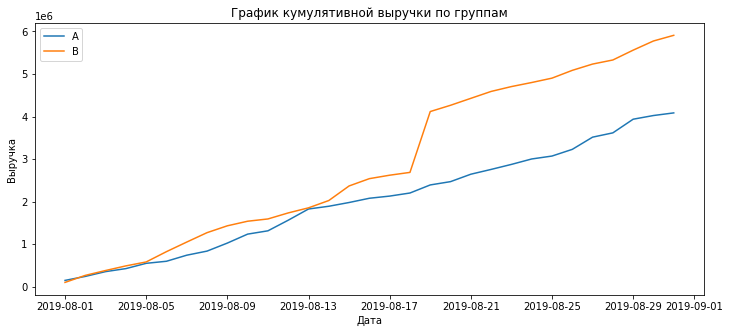

In [25]:
# зададим размеры графика

plt.figure(figsize=(12,5))

# построим график выручки группы А

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')

# построим график выручки группы B

plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.legend()
plt.title("График кумулятивной выручки по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.show()

> Вывод: для группы А выручка равномерно увеличивается в течение всего теста. Для группы В наблюдается резкий скачок между 17 и 21 августа, что может свидетельствовать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения

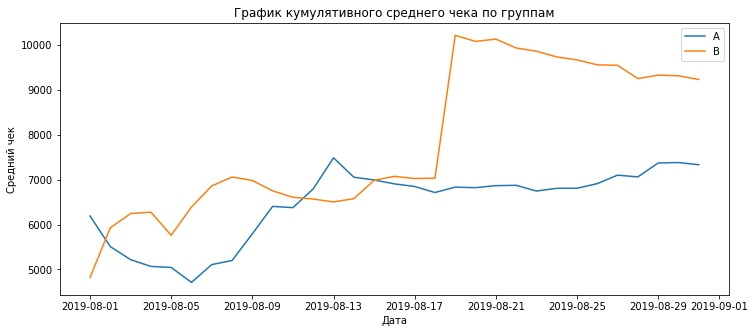

In [26]:
# зададим размеры графика

plt.figure(figsize=(12,5))

# построим график среднего чека по группе А 

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')

# построим график среднего чека по группе В

plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')

plt.legend()
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.show()

> Вывод: для группы А велична среднего чека в первые дни теста падала, затем наблюдался резкий рост до 13 агуста. Затем средний чек становится равномерным к концу теста. Для группы В в начале теста наблюдаются сильные колебания, затем очень резкий скачок между 17 и 21 августа и после величина чека становится равномерной. Возможно, резкий рост величины среднего чека связан с попаданием в группу крупных заказов. 

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения

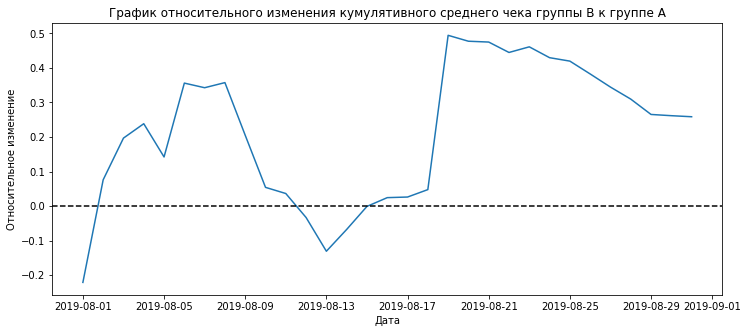

In [27]:
# собираем данные в одном датафрейме

merged_cumulative_revenue = (
    cumulative_revenue_A.merge(
        cumulative_revenue_B, 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['A', 'B']
    )
)

# cтроим отношение средних чеков

plt.figure(figsize=(12,5))
plt.plot(
    merged_cumulative_revenue['date'], 
    (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])
    /
    (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1
)

# добавляем ось X

plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение")
plt.show()

> Вывод: на графике наблюдаются сильные различия между группами в разные даты. 13 августа мы видим, что группа В проигрывает группе А, однако в остальное время значения среднего чека для группы В сильно выше. В данных определенно есть сильно выбивающиеся значения (выбросы).

### Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения

In [28]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

In [29]:
# отделяем данные по группе A

cumulative_data_A = cumulative_data.query('group=="A"')

In [30]:
# отделяем данные по группе B

cumulative_data_B = cumulative_data.query('group=="B"')

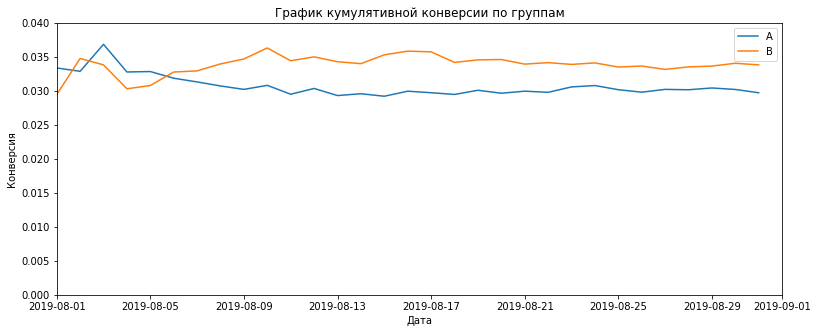

In [31]:
# строим графики

plt.figure(figsize=(13,5))

x_min = dt(2019, 8, 1)
x_max = dt(2019, 9, 1)

plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.axis([x_min, x_max, 0, 0.04]) # задаем масштаб осей
plt.legend()
plt.title("График кумулятивной конверсии по группам")
plt.xlabel("Дата")
plt.ylabel("Конверсия")

plt.show()

> Вывод: для группы А наблюдается резкий скачок среднего числа заказов в начале теста, а затем значения уменьшаются, выравниваются и к концу теста колеблятся примерно у одного значения. Для группы В в начале теста наблюдается резкий всплеск, а затем падение среднего количества заказов. С 4 августа количество заказов растет и достигает максимума. К концу теста конверсия зафиксировалась.
Конверсия группы В в период с 6 агуста и до конца теста выше, чем для группы А.

### Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделаем выводы и предположения

In [32]:
# собираем данные в одном датафрейме

merged_сumulative_сonversions = (
    cumulative_data_A[['date','conversion']].merge(
        cumulative_data_B[['date','conversion']], 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['A', 'B']
    )
)

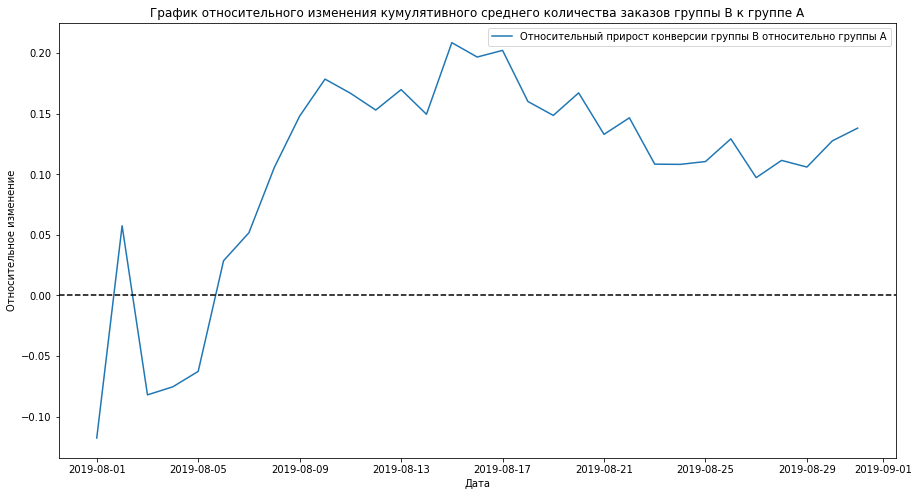

In [33]:
# строим график

plt.figure(figsize=(15,8))
plt.plot(
    merged_сumulative_сonversions['date'], 
    merged_сumulative_сonversions['conversionB']/merged_сumulative_сonversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A"
)
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего количества заказов группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение")
plt.show()

> Вывод: в начале теста группа B проигрывала группе A, затем вырвалась вперёд. Её конверсия в середине теста начала медленно снижаться и к концу теста значение конверсии примерно выровнялось.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения

In [34]:
# подсчитаем количество заказов по пользователям

orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns = ['visitor_id', 'orders']
display(orders_by_users.sort_values(by='orders', ascending=False).head())

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


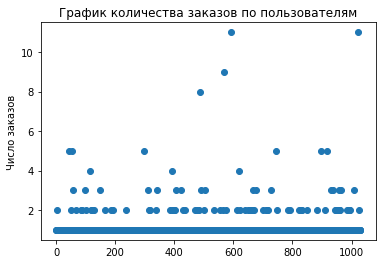

In [35]:
# построим точечный график

x_values = pd.Series(range(0, len(orders_by_users))) 

plt.scatter(x_values, orders_by_users['orders'])
plt.title("График количества заказов по пользователям")
plt.ylabel("Число заказов")
plt.show()

> Вывод: наблюдается достаточное количество пользователей с 2-3 заказами. Их точная доля пока не ясна, следовательно, мы не можем сказать, аномалиии это или нет.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [36]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


> Вывод: не более 5% пользователей  оформляли больше чем 2 заказа и не более 1% - 4 заказа. Примем 2 заказа на одного пользователя за верхнюю границу числа заказов. 

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения

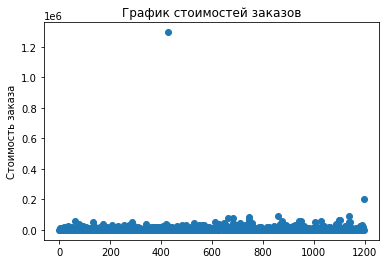

In [37]:
# построим точечный график

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title("График стоимостей заказов")
plt.ylabel("Стоимость заказа")
plt.show()

> Вывод: есть один очень дорогой заказ, стоимостью выше 1.2 млн, и заказ стоимостью выше 200 тысяч. Стоимость основной части заказов по стоимости не превышает 200 000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [38]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


> Вывод: не более 5% заказов дороже 28 000 и не более 1% - дороже 58 234. Примем сумму в 28 000 за верхнюю границу стоимости заказов.

### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделаем выводы и предположения

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. </b>

Непараметрический тест Уилкоксона-Манна-Уитни, alpha = 0.05

In [39]:
# подготовим данные для анализа
# количество пользователей в выбранную дату в группе A

visitors_A_daily = visitors.query('group == "A"')[['date', 'visitors']] 
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

# подсчитаем количество пользователей до выбранной даты включительно в группе A

visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A']

In [40]:
# количество пользователей в выбранную дату в группе В

visitors_B_daily = visitors.query('group == "B"')[['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

# подсчитаем количество пользователей до выбранной даты включительно в группе В

visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']

In [41]:
# количество заказов в выбранную дату в группе A и суммарная выручка в выбранную дату в группе A

orders_A_daily = (
    orders.query('group == "A"')[['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

# подсчитаем суммарное число заказов до выбранной даты включительно в группе A

orders_A_сummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_A_сummulative.columns = [
    'date',
    'orders_сummulative_A',
    'revenue_сummulative_A',
]

In [42]:
# количество заказов в выбранную дату в группе В и суммарная выручка в выбранную дату в группе В

orders_B_daily = (
    orders.query('group == "B"')[['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

# подсчитаем суммарное число заказов до выбранной даты включительно в группе B

orders_B_сummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_B_сummulative.columns = [
    'date',
    'orders_сummulative_B',
    'revenue_сummulative_B',
]

In [43]:
data_stat = (
    orders_A_daily.merge(
        orders_B_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_A_сummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_сummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

display(data_stat.head())

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_сummulative_A,revenue_сummulative_A,orders_сummulative_B,revenue_сummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [44]:
# подсчитаем количество заказов по пользователям для группы А

orders_by_users_A = (
    orders.query('group == "A"')
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['visitor_id', 'orders']

In [45]:
# подсчитаем количество заказов по пользователям для группы В

orders_by_users_B = (
    orders.query('group == "B"')
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['visitor_id', 'orders']

In [46]:
# объявим переменную sample_A, в которой пользователям из группы А будет соответствовать количество заказов

sample_A = (
    pd.concat(
        [orders_by_users_A['orders'],
         pd.Series(
             0, 
             index=np.arange(data_stat['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
                            ), 
             name='orders'
         )
        ],
        axis=0
    )
)

In [47]:
# объявим переменную sample_B, в которой пользователям из группы B будет соответствовать количество заказов

sample_B = (
    pd.concat(
        [orders_by_users_B['orders'],
         pd.Series(
             0, 
             index=np.arange(data_stat['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
                            ), 
             name='orders'
         )
        ],
        axis=0
    )
)

In [48]:
# применим статистический критерий Манна-Уитни к полученным выборкам

alpha = 0.05
p_value_1 = st.mannwhitneyu(sample_A, sample_B)[1]
print('p_value: ', "{0:.3f}".format(p_value_1))
if p_value_1 < alpha:
    print('Отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет')
else:
    print('Не отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет')
print()    
print('Относительный прирост среднего числа заказов группы B: ', "{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

p_value:  0.017
Отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет

Относительный прирост среднего числа заказов группы B:  0.138


> Вывод: p-value = 0.017 меньше уровня значимости 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.</b>

Непараметрический тест Уилкоксона-Манна-Уитни, alpha = 0.05

In [49]:
alpha = 0.05
p_value_2 = st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]
print('p_value: ', "{0:.3f}".format(p_value_2))
if p_value_2 < alpha:
    print('Отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет')
else:
    print('Не отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет')
print()    
print('Разница в среднем чеке между группами А и В: ', "{0:.3f}".format(
    orders.query('group == "B"')['revenue'].mean()/orders.query('group == "A"')['revenue'].mean()-1)
     )

p_value:  0.729
Не отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет

Разница в среднем чеке между группами А и В:  0.259


> Вывод: p-value значительно больше уровня значимости 0.05. Следовательно, мы не отвергаем нулевую гипотезу о том, что в среднем чеке есть различия. Средний чек группы B выше среднего чека группы A на 25.9%.

### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделаем выводы и предположения

In [50]:
# рассмотрим количество аномальных пользователей
order_limit = 2
revenue_limit = 28000
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > order_limit]['visitor_id'],
        orders_by_users_B[orders_by_users_B['orders'] > order_limit]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > revenue_limit]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head())
print(abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64
74


> Вывод: 74 аномальных пользователя

In [51]:
# подготовим выборки количества заказов по пользователям по группам теста

sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_stat['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_stat['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [52]:
# применим статистический критерий Манна-Уитни к полученным выборкам

alpha = 0.05
p_value_3 = st.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]
print('p_value: ', "{0:.3f}".format(p_value_3))
if p_value_3 < alpha:
    print('Отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет')
else:
    print('Не отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет')
print()    
print(
    'Относительный прирост среднего числа заказов группы B: ', 
    "{0:.3f}".format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)
)

p_value:  0.013
Отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет

Относительный прирост среднего числа заказов группы B:  0.173


> Вывод: после "очистки" данных p-value = 0.013 меньше уровня значимости 0.05. Следовательно, мы отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет. Относительный прирост среднего числа заказов группы B составляет 17.3%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения

In [53]:
# подготовим выборки количества заказов по пользователям по группам теста

avg_revenue_A_filtered = orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']

avg_revenue_B_filtered = orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']

In [54]:
# применим статистический критерий Манна-Уитни к полученным выборкам

alpha = 0.05
p_value_4 = st.mannwhitneyu(avg_revenue_A_filtered, avg_revenue_B_filtered)[1]
print('p_value: ', "{0:.3f}".format(p_value_4))
if p_value_4 < alpha:
    print('Отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет')
else:
    print('Не отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет')
print()    
print(
    'Разница в среднем чеке между группами А и B: ', 
    "{0:.2f}".format(avg_revenue_B_filtered.mean()/avg_revenue_A_filtered.mean()-1)
)

p_value:  0.738
Не отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет

Разница в среднем чеке между группами А и B:  -0.02


> Вывод: p-value = 0.738 значительно больше уровня значимости 0.05. Следовательно, мы не отвергаем нулевую гипотезу о том, что в среднем чеке для двух групп А и В есть различия. После фильтрации данных (удаления выбросов) разницы в среднем чеке между группами практически не стало: средний чек группы В ниже группы А всего на 2%. 

Таким образом, общие выводы по результатам теста не изменились. 
* Гипотеза об отсутствии различий в среднем количестве заказов между группами А и В не подтвердилась (на "сырых" и "очищенных" данных p_value оказался меньше уровня статистической значимости)
* Гипотеза об отсутствии различий в среднем чеке между группами А и В не была отвергнута (как на "сырых", так и на "очищенных" данных p_value был сильно больше уровня статистической значимости).

Аномалии сильно повлияли на относительные величины: относительный прирост среднего числа заказов группы B и относительные различия в среднем чеке между группами. 
* Относительный прирост среднего числа заказов группы B после удаления выбросов составил 17.3% (против 13.8%)
* Относительные различия в среднем чеке между группами после очистки данных практически исчезли: средний чек по группе В на 2% ниже, чем для группы А (по "сырым" данным - средний чек группы В выше, чем для группы А, на 25.9%)

### Решение по результатам теста 

Результаты А/В-теста:
* Есть статистически значимое различие в среднем количестве заказов между группами как по сырым данным, так и после фильтрации аномалий.
* Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после удаления аномалий. 
* График различия конверсии между группами показывает, что результаты группы B лучше группы A: в начале теста группа B проигрывала группе A, затем вырвалась вперёд. Её конверсия в середине теста начала медленно снижаться и к концу теста значение конверсии примерно выровнялось.
* График различия среднего чека сильно колеблется, что говорит нам о наличии аномалий. Однако, сделать определённые выводы из этого графика невозможно.

Решение: остановить тест и зафиксировать результаты, а именно большее число заказов в группе В по сравнению с группой А и отсутствие различий между группами по среднему чеку. 

## Вывод

**В ходе выполнения проекта**:
1. **Была проведена предобработка данных, пропущенных значений и дубликатов найдено не было. Названия колонок в датафреймах были переведены в нижний регистр, для столбцов с датами был изменен тип данных**
2. **Приоритизированы гипотезы согласно фреймворкам ICE и RICE** 
* При использовании фреймворка ICE мы получили, что четверка лидеров - это гипотезы:
    - 8 (Запустить акцию, дающую скидку на товар в день рождения), 
    - 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей), 
    - 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), 
    - 6 (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию). 
    Гипотеза 8 обладает наибольшим значением показателя ICE: параметры impact и confidence равны 9 и efforts равен 5.
* В случае фреймворка RICE приоритизация гипотез изменилась: на первое место вышла гипотеза 7 (у нее максимальное значение параметра reach, в то время как у других гипотез он меньше), а на втором - гипотеза 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа). Гипотеза 8 в список лидеров по RICE не вошла - у нее самое низкое значение reach.
* Таким образом, самыми приоритетными являются гипотезы 0, 7, 6, поскольку они фигурируют в резульататх приоритизации в обоих фреймворках.
3. **Проведен анализ А/В-теста**
* Построен график кумулятивной выручки по группам. Для группы А выручка равномерно увеличивалась в течение всего теста. Для группы В наблюдался резкий скачок между 17 и 21 августа 2019 года, что может свидетельствовать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.
* Построен график кумулятивного среднего чека по группам. Для группы А велична среднего чека в первые дни теста падала, затем наблюдался резкий рост до 13 агуста. Затем средний чек становится равномерным к концу теста. Для группы В в начале теста наблюдаются сильные колебания, затем очень резкий скачок между 17 и 21 августа и после величина чека становится равномерной. Возможно, резкий рост величины среднего чека связан с попаданием в группу крупных заказов.
* Построен график относительного изменения кумулятивного среднего чека группы B к группе A, на нем наблюдаются сильные различия между группами в разные даты. 13 августа группа В проигрывает группе А, однако в остальное время значения среднего чека для группы В сильно выше. В данных определенно есть сильно выбивающиеся значения (выбросы).
* Постройте график кумулятивной конверсии заказов по группам. Для группы А наблюдается резкий скачок среднего числа заказов в начале теста, а затем значения уменьшаются, выравниваются и к концу теста колеблятся примерно у одного значения. Для группы В в начале теста наблюдается резкий всплеск, а затем падение среднего количества заказов. С 4 августа количество заказов растет и достигает максимума. К концу теста конверсия зафиксировалась. Конверсия группы В в период с 6 агуста и до конца теста выше, чем для группы А.
* Построен график относительного изменения кумулятивной конверсии группы B к группе A. В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Её конверсия в середине теста начала медленно снижаться и к концу теста значение конверсии примерно выровнялось.
* Построен точечный график количества заказов по пользователям и посчитаны 95-й и 99-й перцентили количества заказов на пользователя. Выяснили, что не более 5% пользователей оформляли больше чем 2 заказа и не более 1% - 4 заказа. Приняли 2 заказа на одного пользователя за верхнюю границу числа заказов.
* Построен точечный график стоимостей заказов и посчитаны 95-й и 99-й перцентили стоимости заказов. Выяснили, что не более 5% заказов дороже 28 000 и не более 1% - дороже 58 234. Сумму в 28 000 была пинята за верхнюю границу стоимости заказов.
4. **Проведен статистический анализ А/В-теста**
* Посчитана статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным. p-value = 0.017 меньше уровня значимости 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8%.
* Посчитана статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. p-value значительно больше уровня значимости 0.05. Следовательно, мы не отвергаем нулевую гипотезу о том, что в среднем чеке есть различия. Средний чек группы B выше среднего чека группы A на 25.9%.
* Посчитана статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным. После фильтрации данных p-value = 0.013 меньше уровня значимости 0.05. Следовательно, мы отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет. Относительный прирост среднего числа заказов группы B составляет 17.3%.
* Посчитана статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. p-value = 0.738 значительно больше уровня значимости 0.05. Следовательно, мы не отвергаем нулевую гипотезу о том, что в среднем чеке для двух групп А и В есть различия. После фильтрации данных (удаления выбросов) разницы в среднем чеке между группами практически не стало: средний чек группы В ниже группы А на 2%.
5. **Принято решение остановить тест и зафиксировать результаты, а именно большее число заказов в группе В по сравнению с группой А и отсутствие различий между группами по среднему чеку.**